In [2]:
import sys
sys.path.insert(0, "../")
from tmds import *
%matplotlib inline

2.7.12 (default, Nov 12 2018, 14:36:49) 
[GCC 5.4.0 20160609]


In [3]:
s = ["SRFA"]
cities = [x for x in range(1, 10)]

In [4]:
df = pd.read_csv("SRFA.csv", "\t")
df["abundance"] = np.log(df["abundance"])
df["H/C"] = df["H"] / df["C"]
df["O/C"] = df["O"] / df["C"]
df["DBE"] = df["C"] - df["H"]/2 + df["N"]/2 + 1
df.sample(3)

,exp,town,abundance,mw,error,C,H,O,N,S,y,H/C,O/C,DBE
6046,SRFA,2,-5.622828,489.054316,-0.048764,21,15,13,1,0,6,0.714286,0.619048,15.0
20132,SRFA,4,-5.274873,364.127136,0.232877,17,20,7,2,0,5,1.176471,0.411765,9.0
2542,SRFA,1,-1.030244,428.168276,0.066799,20,28,10,0,0,9,1.400000,0.500000,7.0


In [5]:
from sklearn.metrics import r2_score

In [6]:
data = []
for i in range(1):
    data.append([])
    for j in range(9):
        data[-1].append([])
        d = df[(df["town"] == cities[j]) & (df["exp"] == s[i])]
        vc = get_flat_van_krevelen(d)
        for k in range(20):
            data[i][j].append(get_set_of_tuples_from_np(vc[k]["C H O N S".split()].values))
tuples = data

In [7]:
corr = np.zeros((6, 20, 5, 5))
for e in range(6):
    for v in range(20):
        for i in range(5):
            for j in range(5):
                try:
                    corr[e][v][i][j] = Jaccard_Needham(tuples[e][i][v], tuples[e][j][v])
                except :
                    corr[e][v][i][j] = 0

In [8]:
vc = np.zeros((1, 9, 20))
for i in range(1):
    for j in range(9):
        vc[i, j] = map(lambda x: len(x), get_flat_van_krevelen(df[(df["town"] == cities[j]) & (df["exp"] == s[i])]))

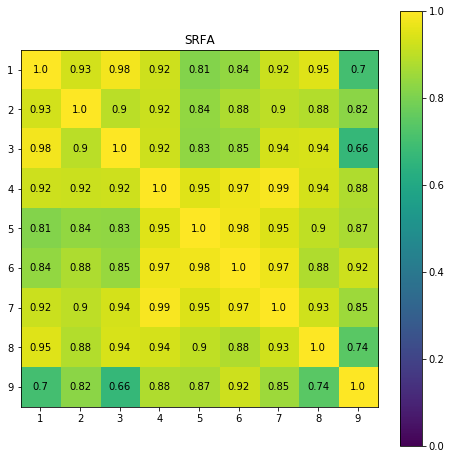

In [9]:
plt.figure(figsize=(8, 8))
for i in range(1):
    plt.title(s[i])
    corr = np.corrcoef(vc[i])
    plt.imshow(np.corrcoef(vc[i]), vmin=0)
    plt.xticks(range(9), cities)
    plt.yticks(range(9), cities)
    
    for i in range(9):
        for j in range(9):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

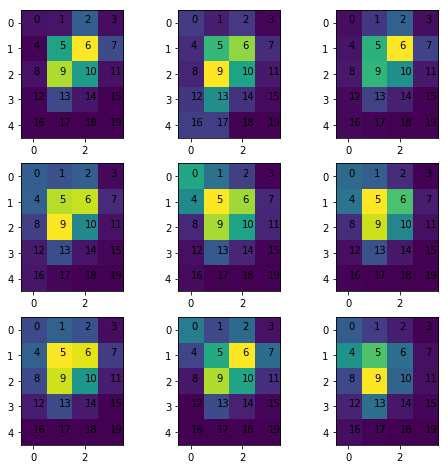

In [10]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(vc[0][i].reshape(5, 4))
    k = 0
    for i in range(5):
        for j in range(4):
            plt.text(j, i, str(k))
            k += 1

In [11]:
q = np.zeros(20)
q[[1, 2, 5, 6, 9, 10]] = 1
short_vc = vc[:,:, q.astype(np.bool)]

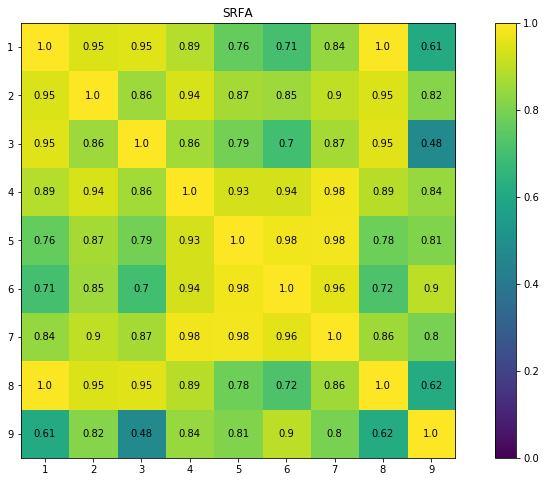

In [12]:
plt.figure(figsize=(14, 8))
for i in range(1):
    
    plt.title(s[i])
    corr = np.corrcoef(short_vc[i])
    plt.imshow(np.corrcoef(short_vc[i]), vmin=0)
    plt.xticks(range(9), cities)
    plt.yticks(range(9), cities)
    
    for i in range(9):
        for j in range(9):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

In [13]:
short_vc.shape

(1, 9, 6)

In [15]:
corr.mean(axis=1)

array([ 0.85579934,  0.90286382,  0.8282642 ,  0.91964767,  0.87850997,
        0.86175406,  0.90974933,  0.8625559 ,  0.76419142])

In [28]:
vc_i = np.zeros((1, 9, 20))
for i in range(1):
    for j in range(9):
        vc_i[i, j] = map(lambda x: np.sum(np.exp(x['abundance'])), get_flat_van_krevelen(df[(df["town"] == cities[j]) & (df["exp"] == s[i])]))

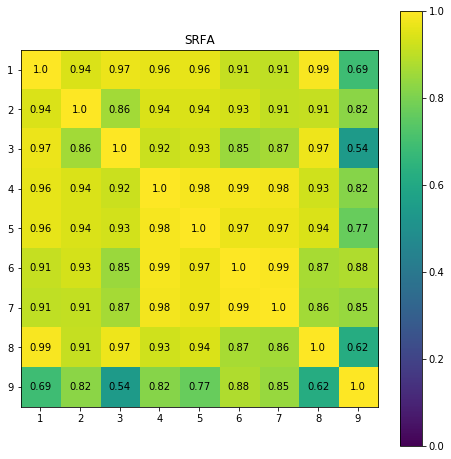

In [29]:
plt.figure(figsize=(8, 8))
for i in range(1):
    plt.title(s[i])
    corr = np.corrcoef(vc_i[i])
    plt.imshow(np.corrcoef(vc_i[i]), vmin=0)
    plt.xticks(range(9), cities)
    plt.yticks(range(9), cities)
    
    for i in range(9):
        for j in range(9):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

In [30]:
q = np.zeros(20)
q[[1, 2, 5, 6, 9, 10]] = 1
short_vc_i = vc_i[:,:, q.astype(np.bool)]

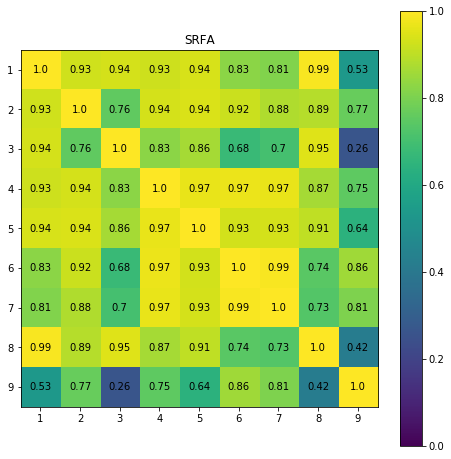

In [31]:
plt.figure(figsize=(8, 8))
for i in range(1):
    
    plt.title(s[i])
    corr = np.corrcoef(short_vc_i[i])
    plt.imshow(np.corrcoef(short_vc_i[i]), vmin=0)
    plt.xticks(range(9), cities)
    plt.yticks(range(9), cities)
    
    for i in range(9):
        for j in range(9):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()